In [1]:
import numpy as np 
import pandas as pd 
import re
import string
import nltk

import matplotlib as plty
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn


from subprocess import check_output

%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import plotly.graph_objs as go
from sklearn import preprocessing
Encode = preprocessing.LabelEncoder()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
vect = CountVectorizer()
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.manifold import TSNE
NB = MultinomialNB()

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

import nltk

from nltk.corpus import stopwords
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [2]:
df = pd.read_csv(r"C:\Users\Reza\Downloads\Coding_Challenge_NLP (1)\training.csv")
val_df = pd.read_csv(r"C:\Users\Reza\Downloads\Coding_Challenge_NLP (1)\validation.csv")

In [3]:
df['im getting on borderlands and i will murder you all ,'].fillna(' ', inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  74681 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [5]:
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [6]:
df.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [7]:
df.head(15)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...


In [8]:
df.loc[:,'im getting on borderlands and i will murder you all ,']

0        I am coming to the borders and I will kill you...
1        im getting on borderlands and i will kill you ...
2        im coming on borderlands and i will murder you...
3        im getting on borderlands 2 and i will murder ...
4        im getting into borderlands and i can murder y...
                               ...                        
74676    Just realized that the Windows partition of my...
74677    Just realized that my Mac window partition is ...
74678    Just realized the windows partition of my Mac ...
74679    Just realized between the windows partition of...
74680    Just like the windows partition of my Mac is l...
Name: im getting on borderlands and i will murder you all ,, Length: 74681, dtype: object

In [9]:
print(df['Positive'].unique())

['Positive' 'Neutral' 'Negative' 'Irrelevant']


In [10]:
df['Positive']=df.loc[:, 'Positive'].map({'Positive':0, 'Neutral':1, 'Negative':2, 'Irrelevant':3})

In [11]:
print(df['Borderlands'].unique())

['Borderlands' 'CallOfDutyBlackopsColdWar' 'Amazon' 'Overwatch'
 'Xbox(Xseries)' 'NBA2K' 'Dota2' 'PlayStation5(PS5)' 'WorldOfCraft'
 'CS-GO' 'Google' 'AssassinsCreed' 'ApexLegends' 'LeagueOfLegends'
 'Fortnite' 'Microsoft' 'Hearthstone' 'Battlefield'
 'PlayerUnknownsBattlegrounds(PUBG)' 'Verizon' 'HomeDepot' 'FIFA'
 'RedDeadRedemption(RDR)' 'CallOfDuty' 'TomClancysRainbowSix' 'Facebook'
 'GrandTheftAuto(GTA)' 'MaddenNFL' 'johnson&johnson' 'Cyberpunk2077'
 'TomClancysGhostRecon' 'Nvidia']


In [12]:
df['Positive'].describe()

count    74681.00000
mean         1.37079
std          1.06727
min          0.00000
25%          0.00000
50%          1.00000
75%          2.00000
max          3.00000
Name: Positive, dtype: float64

<AxesSubplot:xlabel='Positive', ylabel='count'>

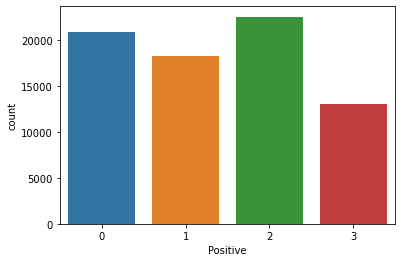

In [13]:
sns.countplot(x='Positive', data=df)

In [14]:
val_df

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [15]:
val_df.columns

Index(['3364', 'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'],
      dtype='object')

In [16]:
print(val_df['Irrelevant'].unique())

['Neutral' 'Negative' 'Positive' 'Irrelevant']


In [17]:
val_df['Irrelevant']=val_df.loc[:, 'Irrelevant'].map({'Positive':0, 'Neutral':1, 'Negative':2, 'Irrelevant':3})

In [18]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                                                                                                                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                              --------------  ----- 
 0   3364                                                                                                                                                                                                                                                999 non-null    int64 
 1   Facebook                                                                   

<AxesSubplot:xlabel='Irrelevant', ylabel='count'>

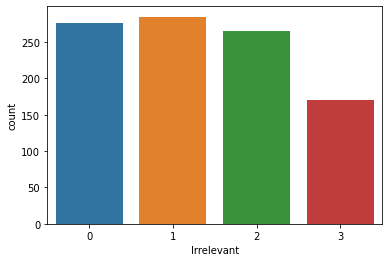

In [19]:
sns.countplot(x='Irrelevant', data=val_df)

In [27]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

train_df = df



vectorizer = CountVectorizer(max_features=40000)
X_train_counts = vectorizer.fit_transform(train_df['im getting on borderlands and i will murder you all ,'])


y_train = train_df['Positive']


nb_model = MultinomialNB()
nb_model.fit(X_train_counts, y_train)


X_val_counts = vectorizer.transform(val_df["I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"])


y_val = val_df['Irrelevant']


y_pred = nb_model.predict(X_val_counts)


accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='weighted')
conf_mat = confusion_matrix(y_val, y_pred)

print(f'Validation accuracy: {accuracy:.3f}')
print(f'Validation F1 score: {f1:.3f}')
print(f'Confusion matrix:\n{conf_mat}')


Validation accuracy: 0.825
Validation F1 score: 0.824
Confusion matrix:
[[251   8  14   4]
 [ 28 214  35   8]
 [ 21  10 233   2]
 [ 18   8  19 126]]


In [34]:
from tensorflow.keras import layers
from keras.layers import Embedding
from tensorflow.keras import Model

class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [35]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [41]:
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_vocab = 10000
tokenizer = Tokenizer(num_words=max_vocab, oov_token="<OOV>")


tokenizer.fit_on_texts(X_train)
X_train = train_df["im getting on borderlands and i will murder you all ,"]
X_val = val_df["I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"]


X_trains = tokenizer.texts_to_sequences(X_train)
X_vals = tokenizer.texts_to_sequences(X_val)


maxlen = 100 
X_train_padded = pad_sequences(X_trains, maxlen=maxlen, padding="post", truncating="post")
X_val_padded = pad_sequences(X_vals, maxlen=maxlen, padding="post", truncating="post")


vocab_size = 20000  





print(len(X_train), "Training sequences")
print(len(X_val), "Validation sequences")
X_train = keras.preprocessing.sequence.pad_sequences(X_trains, maxlen=maxlen)
X_val = keras.preprocessing.sequence.pad_sequences(X_vals, maxlen=maxlen)

74681 Training sequences
999 Validation sequences


In [46]:


embed_dim = 32  
num_heads = 2  
ff_dim = 32  

inputs = layers.Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(4, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)


In [47]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(
    X_train, y_train, batch_size=32, epochs=4, validation_data=(X_val, y_val)
)

Epoch 1/4
2334/2334 [==============================] - 334s 142ms/step - loss: 1.0234 - accuracy: 0.5617 - val_loss: 0.4893 - val_accuracy: 0.8398
Epoch 2/4
2334/2334 [==============================] - 350s 150ms/step - loss: 0.5877 - accuracy: 0.7835 - val_loss: 0.3148 - val_accuracy: 0.8919
Epoch 3/4
2334/2334 [==============================] - 338s 145ms/step - loss: 0.4654 - accuracy: 0.8258 - val_loss: 0.2560 - val_accuracy: 0.9259
Epoch 4/4
2334/2334 [==============================] - 346s 148ms/step - loss: 0.4064 - accuracy: 0.8435 - val_loss: 0.2722 - val_accuracy: 0.9169
